# Binary Logistic Regression
Really simple exercise for me to try these concepts out. I will generate a super simple binary dataset with one predictor (ages and dead) and perform a logistic regression. 
I will model first the probs p(y=alive | x) as a logistic, so the fit should be perfect. 

In [40]:
import random
x_min = 1; x_max = 90; num_xs = 100
x_vals = np.array([random.randint(x_min, x_max) for _ in range(num_xs)])  #ages
X_vals = x_vals.reshape(-1, 1)

In [41]:
import numpy as np

true_intercept = -2
true_slope = 0.05
def logistic(x, true_intercept, true_slope):
    exp_term = np.exp(true_intercept + true_slope * x)
    return exp_term / (1 + exp_term)

y_vals = logistic(x_vals, true_intercept, true_slope)
y_binary = [1 if y > 0.5 else 0 for y in y_vals]
print(y_vals)
print(y_binary)

[0.29943286 0.78583498 0.450166   0.66818777 0.15446527 0.53742985
 0.68997448 0.16798161 0.83889105 0.80999843 0.35434369 0.57444252
 0.31002552 0.9168273  0.5621765  0.88079708 0.88079708 0.41338242
 0.83201839 0.47502081 0.90465054 0.8641271  0.57444252 0.12455336
 0.47502081 0.1480472  0.33181223 0.61063923 0.42555748 0.3208213
 0.14185106 0.75951092 0.77729986 0.80218389 0.80218389 0.88079708
 0.24048908 0.59868766 0.5        0.16110895 0.75951092 0.31002552
 0.19781611 0.80218389 0.72111518 0.38936077 0.59868766 0.14185106
 0.16110895 0.40131234 0.70056714 0.24048908 0.85814894 0.22270014
 0.2592251  0.26894142 0.72111518 0.15446527 0.83201839 0.450166
 0.75026011 0.72111518 0.66818777 0.12455336 0.84553473 0.16798161
 0.90465054 0.12455336 0.59868766 0.9168273  0.88079708 0.92414182
 0.70056714 0.90024951 0.26894142 0.16110895 0.19000157 0.64565631
 0.64565631 0.42555748 0.90887704 0.90887704 0.72111518 0.27888482
 0.79412963 0.66818777 0.52497919 0.61063923 0.89090318 0.7109495

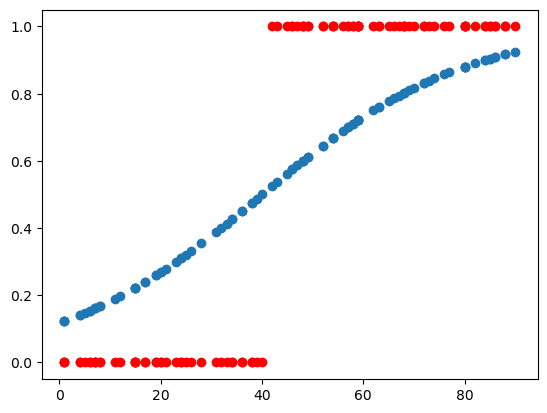

In [42]:
import matplotlib.pyplot as plt
plt.scatter(x_vals, y_vals)
plt.scatter(x_vals, y_binary, color='red')

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vals, y_binary, test_size=0.2, random_state=0)

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)

[0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1]


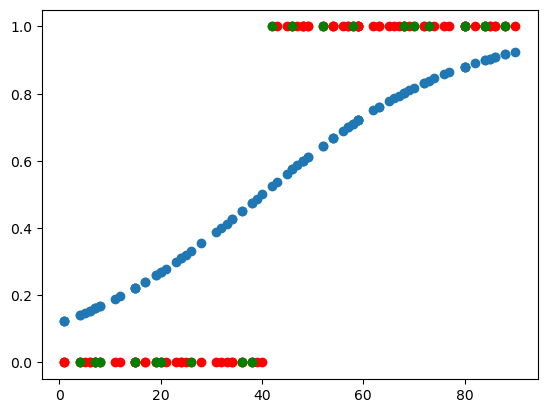

In [46]:
plt.scatter(x_vals, y_vals)
plt.scatter(x_vals, y_binary, color='red')
plt.scatter(X_test, predictions, color='green')

In [47]:
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


# Now, what if the data doesn't follow a logistic distribution?
I'll re-do the calculations with some other function, like a square.

In [67]:
import random
x_min = 1; x_max = 90; num_xs = 100
x_vals = np.array([random.randint(x_min, x_max) for _ in range(num_xs)])  #ages
X_vals = x_vals.reshape(-1, 1)

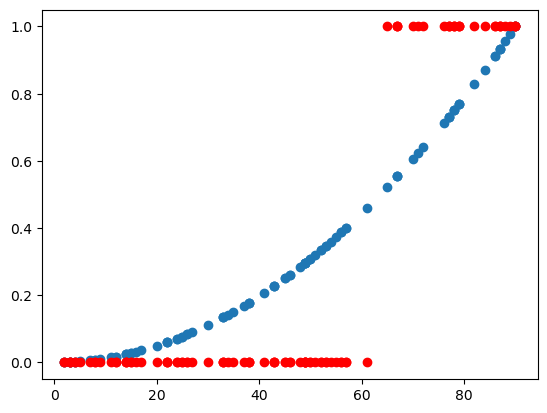

In [69]:
y_vals = (1/x_max**2)*x_vals**2 #so that y=1 at x=x_max and y=0 at x=0
y_binary = [1 if y > 0.5 else 0 for y in y_vals]
import matplotlib.pyplot as plt
plt.scatter(x_vals, y_vals)
plt.scatter(x_vals, y_binary, color='red')

In [70]:
def predict_logistic(X_vals, y_binary):
    X_train, X_test, y_train, y_test = train_test_split(X_vals, y_binary, test_size=0.2, random_state=0)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(predictions)
    accuracy = model.score(X_test, y_test)
    print(f"Accuracy: {accuracy}")
    return X_test, predictions

X_test, predictions = predict_logistic(X_vals, y_binary)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
Accuracy: 1.0


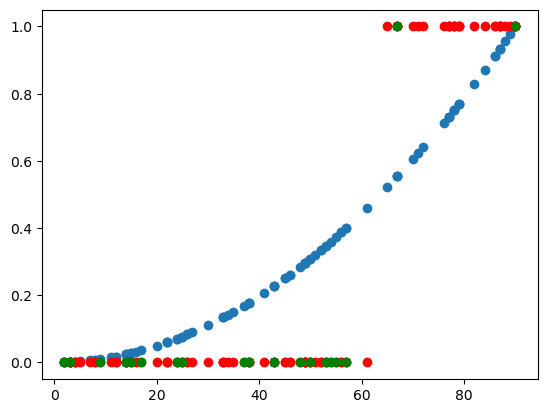

In [71]:
plt.scatter(x_vals, y_vals)
plt.scatter(x_vals, y_binary, color='red')
plt.scatter(X_test, predictions, color='green')